# Bharath Intern

# Task 2: Handwritten Digit Recognition Using MNIST Dataset With The Help Of Neural Network.

# Dataset Used : MNIST Dataset

# About Dataset

MNIST is a commonly used dataset in machine learning and computer vision research, which consists of a set of 70,000 images of handwritten digits (0-9), each of size 28x28 pixels. The dataset is split into two sets: a training set of 60,000 images and a test set of 10,000 images. The training set is used to train a machine learning model, while the test set is used to evaluate the model's performance.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax

# TensorFlow already contain MNIST data set which can be loaded using Keras
import tensorflow as tf # installing tenserflow
from tensorflow import keras

In [2]:
# To Load the MNIST dataset from the Keras API provided by TensorFlow.
mnist = tf.keras.datasets.mnist

The Above Code Reflects that the Dataset Contains :

1.An array of 60,000 images, each represented as a 28x28 NumPy array, with pixel values ranging from 0 to 255

2.An array of 60,000 labels, each representing the correct digit (0-9) for the 1.

3.An array of 10,000 images, each represented as a 28x28 NumPy array, with pixel values ranging from 0 to 255.

4.An array of 10,000 labels, each representing the correct digit (0-9) for the 3.

# Dividing the data into train and test data.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
# Reshaping the input Data which is used as a input in CNN in Tenserflow
# CNN takes the input Data in 4D Format with the shape (num_samples, image_height, image_width, num_channels)
# Here (num_channels) is set to 1 which means input image is Grayscale.

x_train = x_train.reshape((x_train.shape[0] , x_train.shape[1] , x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0] , x_test.shape[1] , x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


(60000, 28, 28, 1)

In [8]:
# Normalizing Pixel Values

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


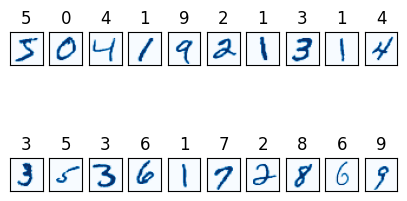

In [9]:
# Visulaizing Subsets of images in MNIST Dataset along with coressponding labels.

fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

In [10]:
# showing shape of single image
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

# BUILDING NEURAL NETWORK THAT CAN READ HANDWRITTEN DIGITS.

In [11]:
# Creating aSequential Model in Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Making Prediction on Model
prediction = model(x_train[:1]).numpy()
prediction

array([[ 0.48889935,  0.56467783,  0.32560462,  0.00733178, -0.10934149,
        -0.10878527, -0.10591574, -0.54629093, -0.33876666,  0.12744701]],
      dtype=float32)

In [20]:
# Applying Softmax() Function to prediction array
# This convert an output vector of real numbers into a probability distribution over predicted classes
tf.nn.softmax(prediction).numpy()

array([[0.14955965, 0.16133352, 0.12702711, 0.09240007, 0.08222459,
        0.08227034, 0.08250675, 0.05311742, 0.06536777, 0.10419279]],
      dtype=float32)

In [21]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

# Model fitting

In [22]:
# Training the Model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2982 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1446 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1092 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0898 - accuracy: 0.9716
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0758 - accuracy: 0.9760


In [23]:
# Evaluating the Model
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0817 - accuracy: 0.9762 - 1s/epoch - 4ms/step


[0.08174535632133484, 0.9761999845504761]

In [24]:
# Creating a new sequential model which includes both previously trained model and softmax layer.
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.54399515e-08, 6.30830055e-09, 1.95639950e-06, 1.16546598e-05,
        4.92100501e-12, 1.37591414e-07, 1.82265607e-13, 9.99978662e-01,
        8.61287930e-08, 7.44949784e-06],
       [2.28389685e-09, 1.89784833e-03, 9.98100221e-01, 1.46819821e-06,
        3.75638919e-14, 4.24006030e-09, 3.55564787e-08, 4.83931539e-14,
        5.33679724e-07, 1.17001356e-14],
       [9.55095061e-07, 9.99213457e-01, 3.68783549e-05, 1.04473220e-05,
        4.08723463e-05, 1.39191588e-05, 2.11982697e-05, 2.38434601e-04,
        4.20395168e-04, 3.46153547e-06],
       [9.99979496e-01, 3.99166283e-10, 1.25783126e-05, 8.14235968e-09,
        2.29398736e-07, 3.19277653e-08, 7.48865978e-06, 2.72833862e-08,
        1.36168277e-09, 6.93948508e-08],
       [4.14052192e-06, 2.70346323e-09, 1.97377703e-05, 6.53694713e-07,
        9.95054007e-01, 1.14005111e-07, 1.02129716e-05, 3.17772756e-05,
        3.86073623e-07, 4.87903692e-03]], dtype=float32)>

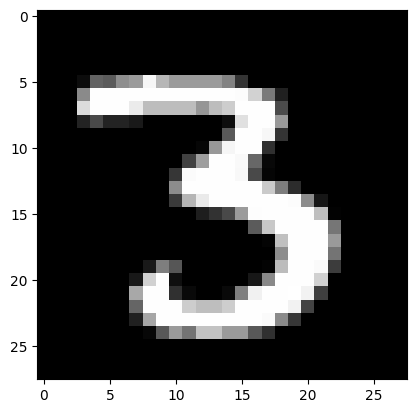

In [25]:
# Displaying a Grayscale Image
img = x_train[12]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [26]:
# Predicting the Result
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 199ms/step
predicted : 3
